In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_projection(img, axis):
  # axis = 0 for vertical projection
  # axis = 1 for horizontal projection
  img = img.copy()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  height, width = img.shape
  _, threshold_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)
  pixel_sum = np.sum(threshold_image, axis=axis)
  if (axis==0):
    projection = pixel_sum / (height*255)
  elif (axis==1):
    projection = pixel_sum / (width*255)
  return projection

def horizontal_edges(horizontal_projection):
    height = len(horizontal_projection)
    start = 0
    end = height - 1
    for i in range(height):
        if (i < height - 1):
            if (horizontal_projection[i] < horizontal_projection[i+1]):
                start = i
                break
    for i in range(height):
        if (i < height - 1):
            if (horizontal_projection[height-i-1] < horizontal_projection[height-i-2]):
                end = height-i-1
                break
    return (start, end)

def vertical_edges(vertical_projection):
  edges = []
  indicator = 0
  for i in range(len(vertical_projection)):
    if (indicator%2 == 0):
      if (i+1 ==len(vertical_projection)):
        break
      if (vertical_projection[i] < vertical_projection[i+1] 
          and vertical_projection[i] == 0):
          edges.append(i)
          indicator += 1
    else:
      if (vertical_projection[i-1] > vertical_projection[i] 
          and vertical_projection[i] == 0):
        edges.append(i)
        indicator += 1
  return np.array(edges).reshape(int(len(edges)/2),2)

def plot_horizontal_projection(img):
  height, width, _ = img.shape
  horizontal_projection = calculate_projection(img, axis=1)
  plt.plot(horizontal_projection, np.arange(height))
  plt.title('Horizontal Projection')
  # plt.xlim([0,1])
  plt.gca().invert_yaxis()

def plot_vertical_projection(img):
  vertical_projection = calculate_projection(img, axis=0)
  plt.plot(vertical_projection)
  plt.title('Vertical Projection')
  # plt.ylim([0, 1])

def segment_digits(img):
  img = img.copy()
  # Add White Border
  img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, 
                           value = [255, 255, 255])
  horizontal_projection = calculate_projection(img, axis=1)
  horiz_start, horiz_end = horizontal_edges(horizontal_projection)
  horiz_cropped_img = img[horiz_start:horiz_end+1,:]
  vertical_projection = calculate_projection(horiz_cropped_img, axis=0)
  v_edges = vertical_edges(vertical_projection)
  segments = []
  for edge in v_edges:
    segment = horiz_cropped_img.copy()[:,edge[0]:edge[1]+1]
    segment = cv2.resize(segment, (224, 224), interpolation=cv2.INTER_AREA)
    segments.append(segment)
  return np.array(segments)  


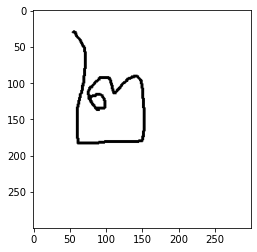

In [36]:
img = cv2.imread('2_001.png')
# img = cv2.imread('112-thai.png')
plt.imshow(img)

In [6]:
digits = segment_digits(img)
print(digits.shape)

(0,)


True

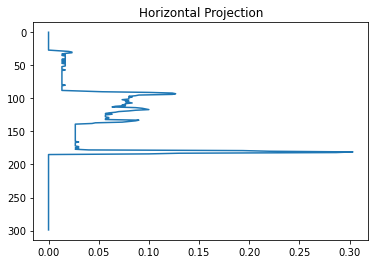

In [37]:
plot_horizontal_projection(img)

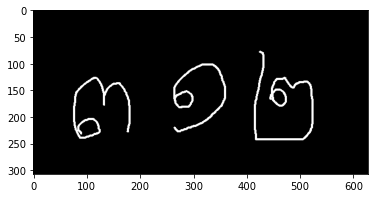

In [12]:
img = cv2.imread('312.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img.shape
_, threshold_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshold_image, cmap='gray')

In [ ]:
digit_segments = segment_digits(img)

for idx, segment_img in enumerate(digit_segments):
  plt.subplot(1,len(digit_segments), idx+1), plt.imshow(segment_img)